# Data-Driven Insights on Screen Time and Mental Health

## Project: Exploring Factors Influencing Health and Lifestyle Choices

This notebook analyzes the relationship between digital device usage patterns and mental health outcomes using exploratory data analysis, hypothesis testing, and correlation analyses.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Load data
df = pd.read_csv('../resources/digital_diet_mental_health.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2000, 25)


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


## 2. Exploratory Data Analysis (EDA)

### 2.1 Dataset Overview

In [2]:
# Basic info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null  

In [3]:
# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


Missing Values:
No missing values found!


### 2.2 Summary Statistics for Continuous Variables

In [4]:
# Identify continuous and categorical variables
continuous_vars = df.select_dtypes(include=[np.number]).columns.tolist()
continuous_vars.remove('user_id') if 'user_id' in continuous_vars else None

categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print(f"Continuous Variables ({len(continuous_vars)}): {continuous_vars}")
print(f"\nCategorical Variables ({len(categorical_vars)}): {categorical_vars}")

Continuous Variables (22): ['age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'mental_health_score', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']

Categorical Variables (3): ['user_id', 'gender', 'location_type']


In [5]:
# Summary statistics
summary_stats = df[continuous_vars].describe().T
summary_stats['median'] = df[continuous_vars].median()
summary_stats['variance'] = df[continuous_vars].var()
summary_stats['skewness'] = df[continuous_vars].skew()
summary_stats['kurtosis'] = df[continuous_vars].kurtosis()
summary_stats = summary_stats[['count', 'mean', 'median', 'std', 'variance', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]
summary_stats.round(2)

,count,mean,median,std,variance,min,25%,50%,75%,max,skewness,kurtosis
age,2000.0,38.81,39.00,14.93,222.88,13.0,26.0,39.00,51.00,64.0,-0.04,-1.16
daily_screen_time_hours,2000.0,6.03,6.00,1.97,3.90,0.0,4.7,6.00,7.32,13.3,0.02,-0.03
phone_usage_hours,2000.0,3.02,3.00,1.45,2.10,0.0,2.0,3.00,4.00,8.4,0.12,-0.23
laptop_usage_hours,2000.0,2.00,2.00,1.00,1.00,0.0,1.3,2.00,2.70,5.6,0.13,-0.31
tablet_usage_hours,2000.0,1.00,1.00,0.49,0.24,0.0,0.6,1.00,1.30,2.5,0.03,-0.46
tv_usage_hours,2000.0,1.50,1.50,0.96,0.92,0.0,0.8,1.50,2.20,4.7,0.37,-0.30
social_media_hours,2000.0,2.04,2.00,1.13,1.28,0.0,1.2,2.00,2.80,5.8,0.27,-0.34
work_related_hours,2000.0,2.01,2.00,1.12,1.25,0.0,1.2,2.00,2.80,5.9,0.16,-0.40
entertainment_hours,2000.0,2.47,2.40,1.24,1.53,0.0,1.6,2.40,3.30,6.8,0.16,-0.29
gaming_hours,2000.0,1.28,1.20,0.89,0.80,0.0,0.6,1.20,1.90,4.0,0.43,-0.40


### 2.3 Categorical Variables Distribution

In [6]:
# Gender distribution
print("Gender Distribution:")
print(df['gender'].value_counts())
print(f"\nPercentages:\n{df['gender'].value_counts(normalize=True) * 100}")

Gender Distribution:
gender
Female    935
Male      882
Other     183
Name: count, dtype: int64

Percentages:
gender
Female    46.75
Male      44.10
Other      9.15
Name: proportion, dtype: float64


In [7]:
# Location type distribution
print("\nLocation Type Distribution:")
print(df['location_type'].value_counts())
print(f"\nPercentages:\n{df['location_type'].value_counts(normalize=True) * 100}")


Location Type Distribution:
location_type
Urban       999
Suburban    605
Rural       396
Name: count, dtype: int64

Percentages:
location_type
Urban       49.95
Suburban    30.25
Rural       19.80
Name: proportion, dtype: float64


### 2.4 Visualizations - Distributions

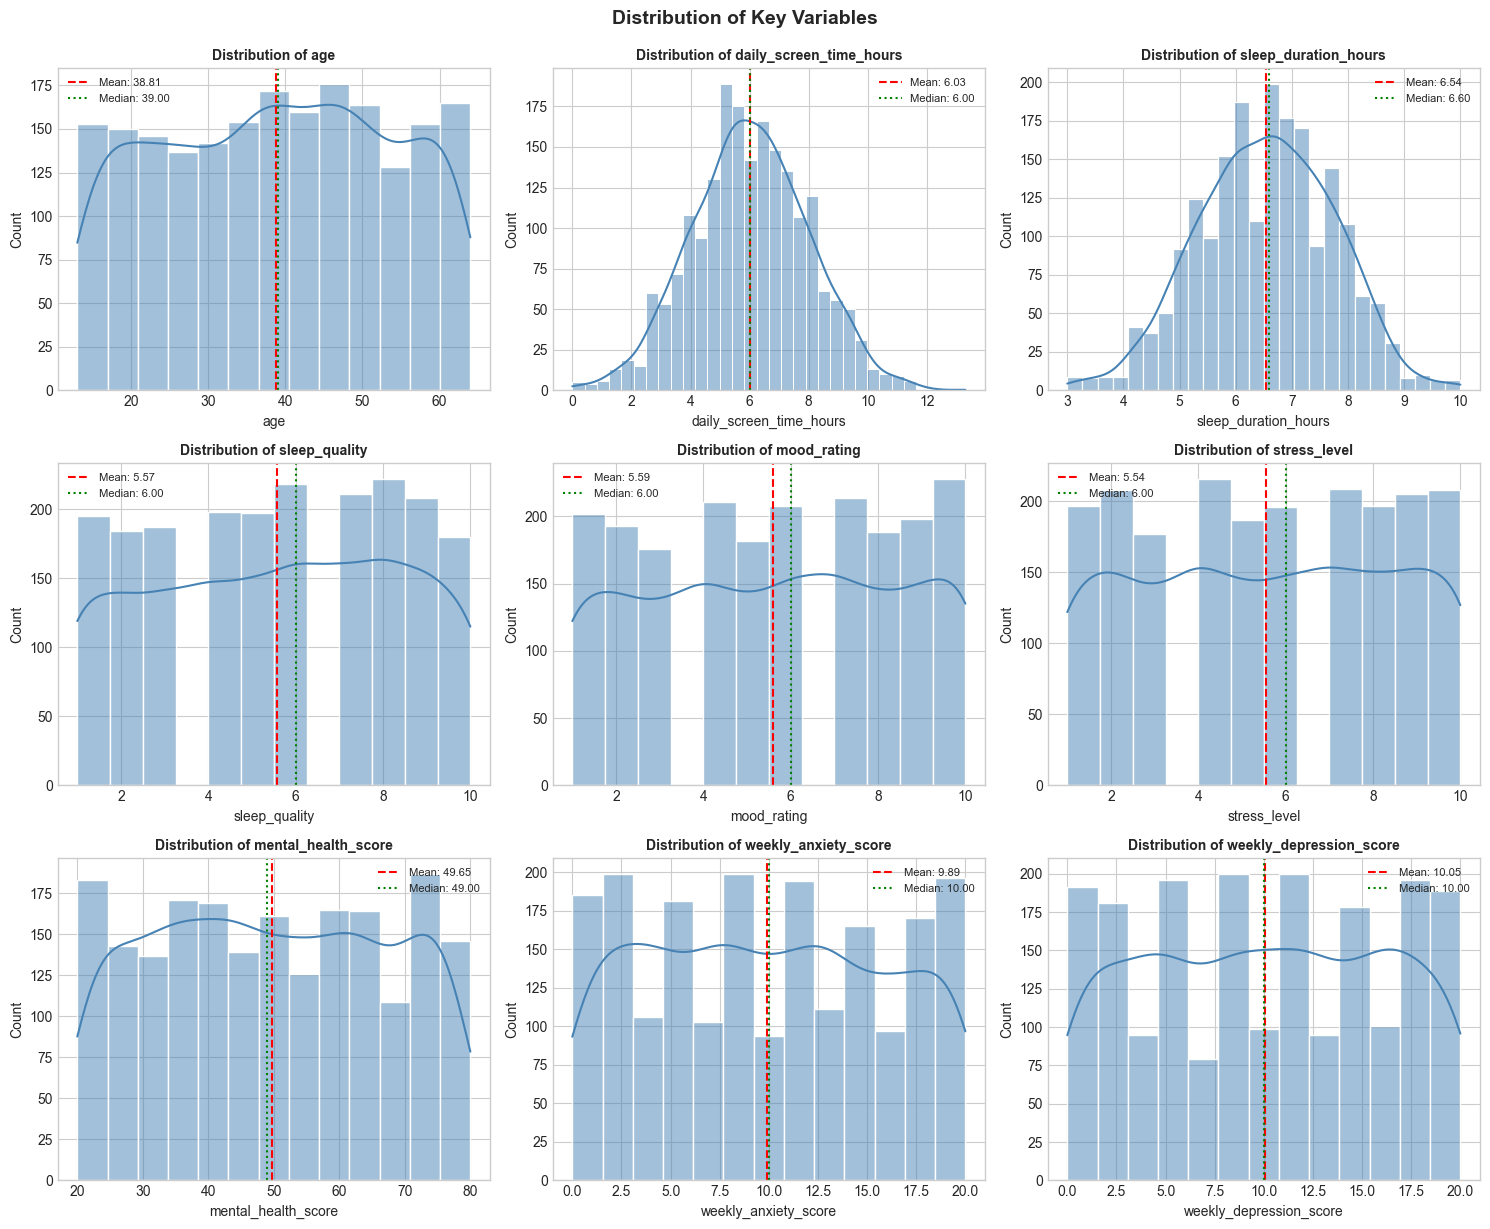

In [8]:
# Key variables for visualization
key_vars = ['age', 'daily_screen_time_hours', 'sleep_duration_hours', 'sleep_quality', 
            'mood_rating', 'stress_level', 'mental_health_score', 'weekly_anxiety_score', 
            'weekly_depression_score']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    ax = axes[i]
    sns.histplot(data=df, x=var, kde=True, ax=ax, color='steelblue', edgecolor='white')
    ax.axvline(df[var].mean(), color='red', linestyle='--', label=f'Mean: {df[var].mean():.2f}')
    ax.axvline(df[var].median(), color='green', linestyle=':', label=f'Median: {df[var].median():.2f}')
    ax.set_title(f'Distribution of {var}', fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Distribution of Key Variables', y=1.02, fontsize=14, fontweight='bold')
plt.show()

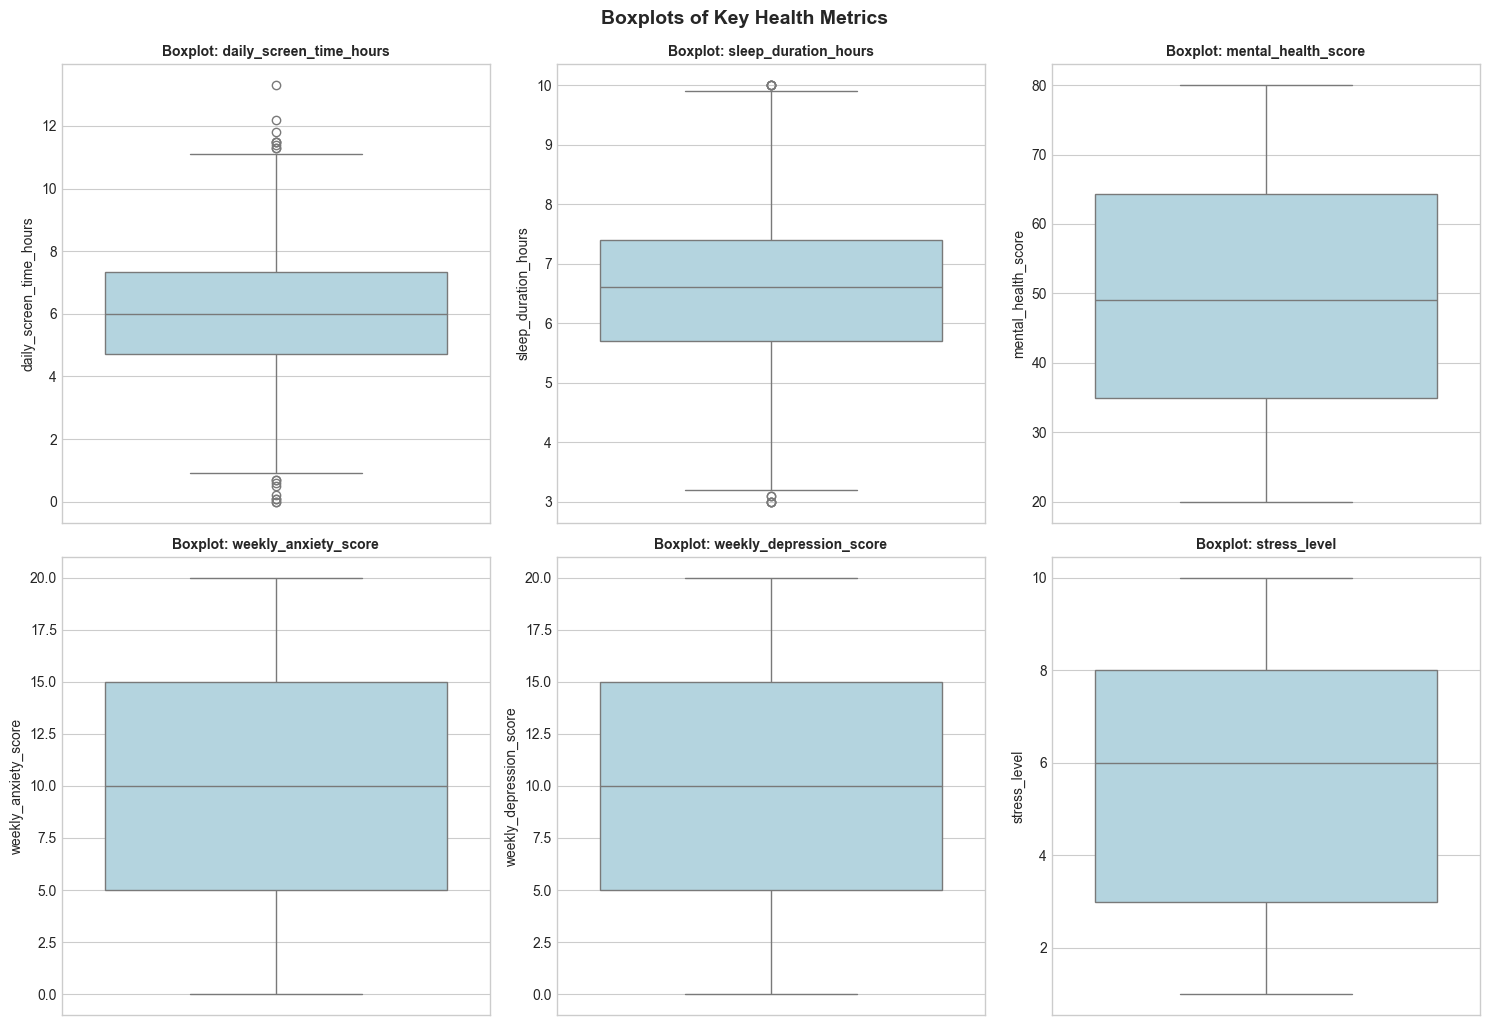

In [9]:
# Boxplots for key variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

boxplot_vars = ['daily_screen_time_hours', 'sleep_duration_hours', 'mental_health_score',
                'weekly_anxiety_score', 'weekly_depression_score', 'stress_level']

for i, var in enumerate(boxplot_vars):
    ax = axes[i]
    sns.boxplot(data=df, y=var, ax=ax, color='lightblue')
    ax.set_title(f'Boxplot: {var}', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('Boxplots of Key Health Metrics', y=1.02, fontsize=14, fontweight='bold')
plt.show()

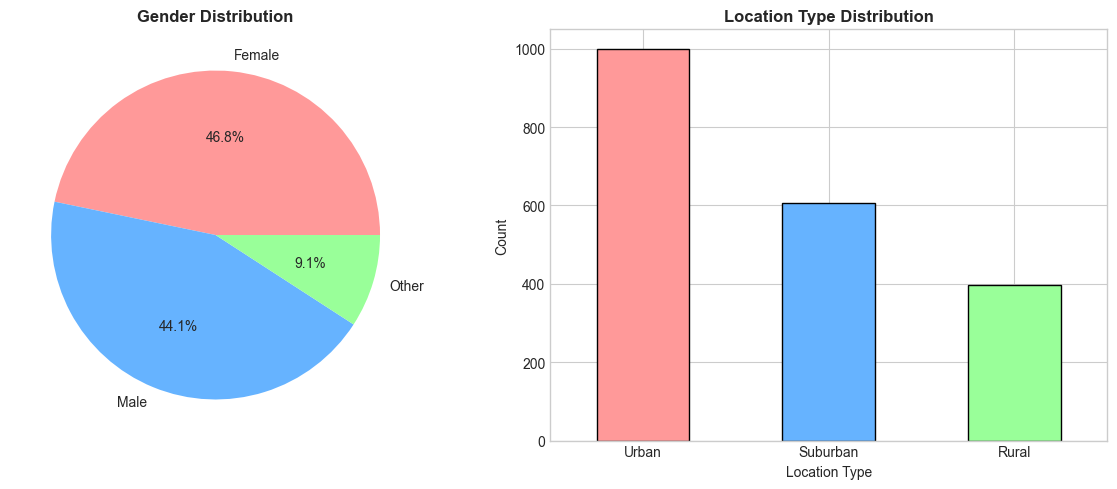

In [10]:
# Categorical distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gender pie chart
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Gender Distribution', fontweight='bold')
axes[0].set_ylabel('')

# Location type bar chart
df['location_type'].value_counts().plot(kind='bar', ax=axes[1], color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')
axes[1].set_title('Location Type Distribution', fontweight='bold')
axes[1].set_xlabel('Location Type')
axes[1].set_ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### 2.5 Screen Time Analysis by Device

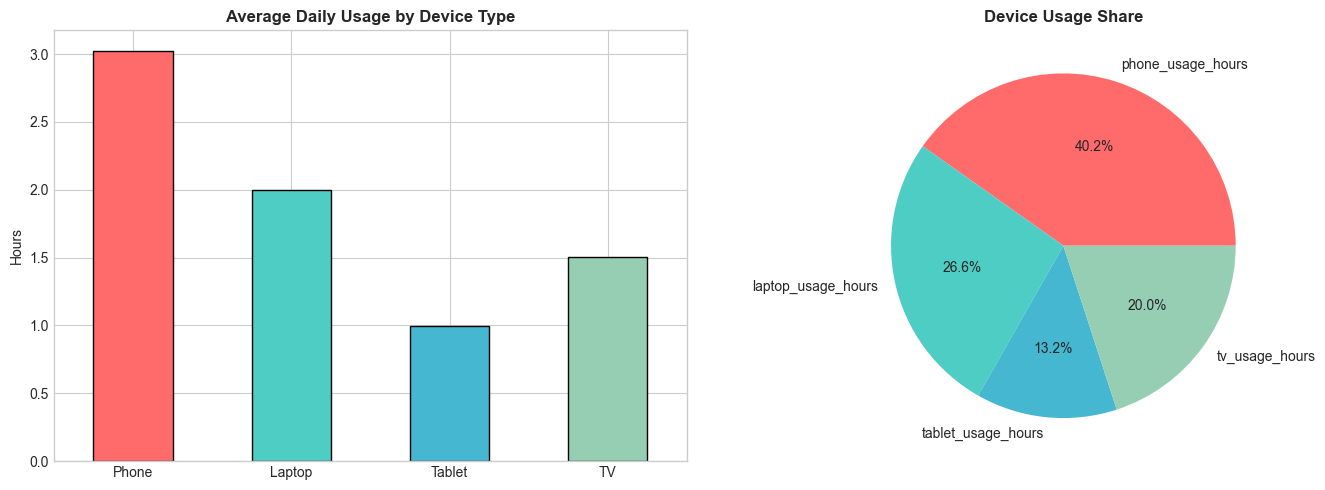

In [11]:
# Device usage breakdown
device_cols = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']
device_means = df[device_cols].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
device_means.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Average Daily Usage by Device Type', fontweight='bold')
axes[0].set_ylabel('Hours')
axes[0].set_xticklabels(['Phone', 'Laptop', 'Tablet', 'TV'], rotation=0)

# Pie chart
device_means.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=colors)
axes[1].set_title('Device Usage Share', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Hypothesis Testing

### 3.1 Hypothesis 1: High Screen Time Users Have Lower Mental Health Scores

**H₀**: There is no difference in mental health scores between high and low screen time users  
**H₁**: High screen time users have lower mental health scores than low screen time users

In [12]:
# Create groups based on median screen time
median_screen_time = df['daily_screen_time_hours'].median()
df['screen_time_group'] = df['daily_screen_time_hours'].apply(lambda x: 'High' if x > median_screen_time else 'Low')

high_screen = df[df['screen_time_group'] == 'High']['mental_health_score']
low_screen = df[df['screen_time_group'] == 'Low']['mental_health_score']

print(f"Median Screen Time: {median_screen_time:.2f} hours")
print(f"\nHigh Screen Time Group (n={len(high_screen)}): Mean = {high_screen.mean():.2f}, Std = {high_screen.std():.2f}")
print(f"Low Screen Time Group (n={len(low_screen)}): Mean = {low_screen.mean():.2f}, Std = {low_screen.std():.2f}")

# Independent samples t-test
t_stat, p_value = stats.ttest_ind(high_screen, low_screen)
print(f"\n--- Independent Samples T-Test ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'} at α = 0.05")

Median Screen Time: 6.00 hours

High Screen Time Group (n=989): Mean = 49.73, Std = 17.43
Low Screen Time Group (n=1011): Mean = 49.57, Std = 17.67

--- Independent Samples T-Test ---
T-statistic: 0.2004
P-value: 0.8412

Conclusion: Fail to reject H₀ at α = 0.05


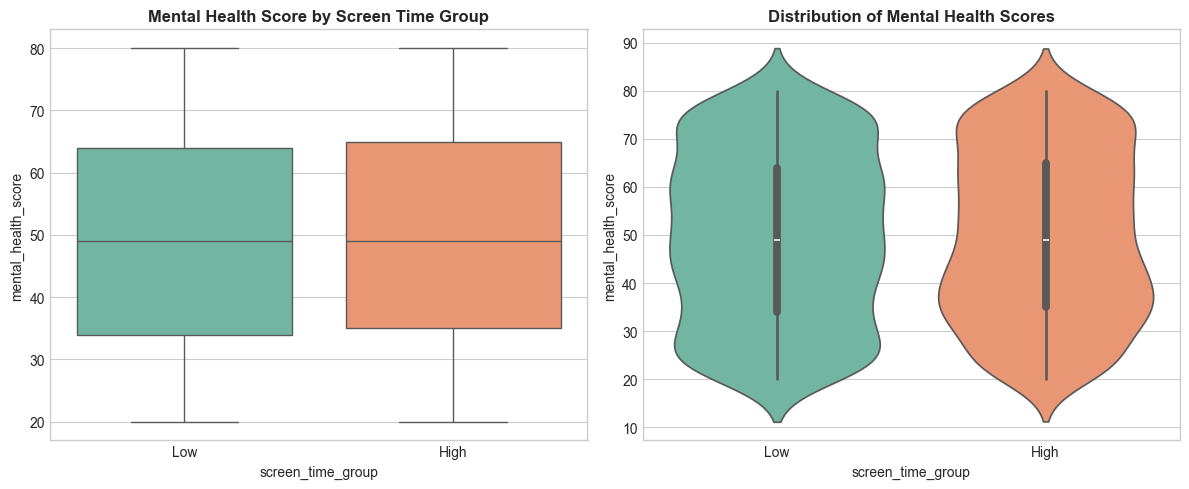

In [13]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='screen_time_group', y='mental_health_score', ax=axes[0], palette='Set2')
axes[0].set_title('Mental Health Score by Screen Time Group', fontweight='bold')

sns.violinplot(data=df, x='screen_time_group', y='mental_health_score', ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Mental Health Scores', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Hypothesis 2: Wellness App Users Have Better Mental Health Scores

**H₀**: There is no difference in mental health scores between wellness app users and non-users  
**H₁**: Wellness app users have higher mental health scores

In [14]:
wellness_users = df[df['uses_wellness_apps'] == 1]['mental_health_score']
non_wellness = df[df['uses_wellness_apps'] == 0]['mental_health_score']

print(f"Wellness App Users (n={len(wellness_users)}): Mean = {wellness_users.mean():.2f}, Std = {wellness_users.std():.2f}")
print(f"Non-Users (n={len(non_wellness)}): Mean = {non_wellness.mean():.2f}, Std = {non_wellness.std():.2f}")

t_stat, p_value = stats.ttest_ind(wellness_users, non_wellness)
print(f"\n--- Independent Samples T-Test ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'} at α = 0.05")

Wellness App Users (n=775): Mean = 50.20, Std = 17.14
Non-Users (n=1225): Mean = 49.30, Std = 17.80

--- Independent Samples T-Test ---
T-statistic: 1.1140
P-value: 0.2654

Conclusion: Fail to reject H₀ at α = 0.05


### 3.3 Hypothesis 3: Mental Health Scores Differ by Location Type (ANOVA)

**H₀**: Mean mental health scores are equal across all location types  
**H₁**: At least one location type has a different mean mental health score

In [15]:
urban = df[df['location_type'] == 'Urban']['mental_health_score']
suburban = df[df['location_type'] == 'Suburban']['mental_health_score']
rural = df[df['location_type'] == 'Rural']['mental_health_score']

print("Group Statistics:")
print(f"Urban (n={len(urban)}): Mean = {urban.mean():.2f}, Std = {urban.std():.2f}")
print(f"Suburban (n={len(suburban)}): Mean = {suburban.mean():.2f}, Std = {suburban.std():.2f}")
print(f"Rural (n={len(rural)}): Mean = {rural.mean():.2f}, Std = {rural.std():.2f}")

# One-way ANOVA
f_stat, p_value = stats.f_oneway(urban, suburban, rural)
print(f"\n--- One-Way ANOVA ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'} at α = 0.05")

Group Statistics:
Urban (n=999): Mean = 49.92, Std = 17.74
Suburban (n=605): Mean = 49.32, Std = 17.60
Rural (n=396): Mean = 49.47, Std = 16.99

--- One-Way ANOVA ---
F-statistic: 0.2517
P-value: 0.7775

Conclusion: Fail to reject H₀ at α = 0.05


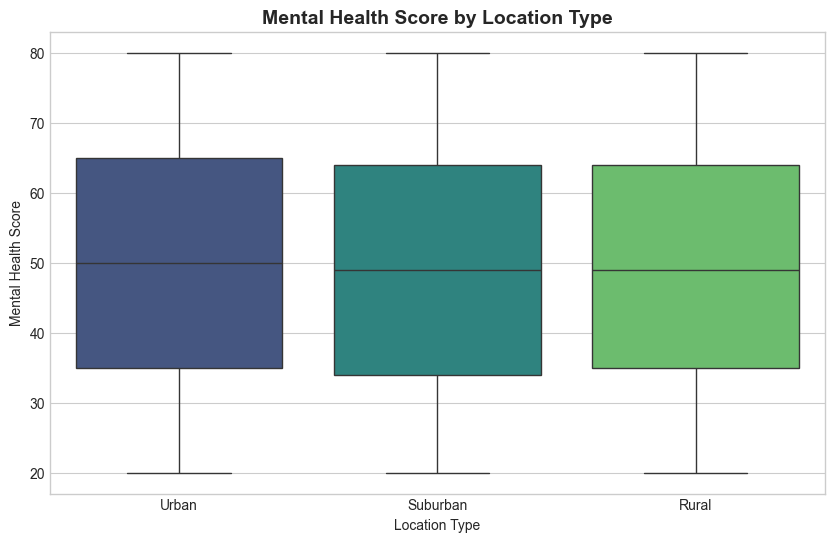

In [16]:
# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='location_type', y='mental_health_score', palette='viridis')
plt.title('Mental Health Score by Location Type', fontweight='bold', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Mental Health Score')
plt.show()

### 3.4 Hypothesis 4: Higher Physical Activity Associated with Lower Anxiety

**H₀**: There is no difference in anxiety scores between high and low physical activity groups  
**H₁**: High physical activity is associated with lower anxiety scores

In [17]:
median_activity = df['physical_activity_hours_per_week'].median()
high_activity = df[df['physical_activity_hours_per_week'] > median_activity]['weekly_anxiety_score']
low_activity = df[df['physical_activity_hours_per_week'] <= median_activity]['weekly_anxiety_score']

print(f"Median Physical Activity: {median_activity:.2f} hours/week")
print(f"\nHigh Activity (n={len(high_activity)}): Mean Anxiety = {high_activity.mean():.2f}")
print(f"Low Activity (n={len(low_activity)}): Mean Anxiety = {low_activity.mean():.2f}")

t_stat, p_value = stats.ttest_ind(high_activity, low_activity)
print(f"\n--- Independent Samples T-Test ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'} at α = 0.05")

Median Physical Activity: 3.00 hours/week

High Activity (n=980): Mean Anxiety = 10.02
Low Activity (n=1020): Mean Anxiety = 9.76

--- Independent Samples T-Test ---
T-statistic: 0.9517
P-value: 0.3414

Conclusion: Fail to reject H₀ at α = 0.05


## 4. Correlation Testing

### 4.1 Pearson Correlation: Daily Screen Time vs Mental Health Score

In [18]:
corr, p_value = pearsonr(df['daily_screen_time_hours'], df['mental_health_score'])
print("=" * 50)
print("Pearson Correlation: Screen Time vs Mental Health")
print("=" * 50)
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nInterpretation: {'Weak' if abs(corr) < 0.3 else 'Moderate' if abs(corr) < 0.7 else 'Strong'} "
      f"{'positive' if corr > 0 else 'negative'} correlation")
print(f"Statistical Significance: {'Significant' if p_value < 0.05 else 'Not significant'} at α = 0.05")

Pearson Correlation: Screen Time vs Mental Health
Correlation Coefficient: 0.0055
P-value: 0.8052

Interpretation: Weak positive correlation
Statistical Significance: Not significant at α = 0.05


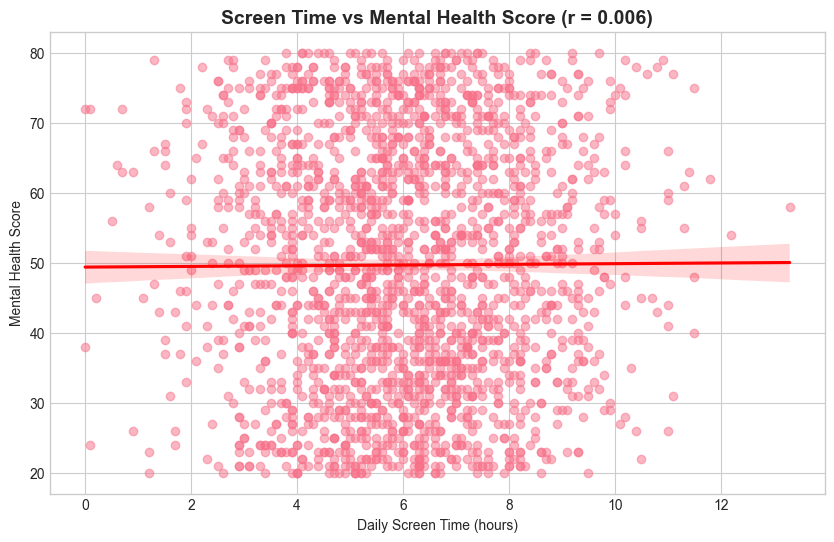

In [19]:
# Scatterplot with regression line
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df, x='daily_screen_time_hours', y='mental_health_score', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Screen Time vs Mental Health Score (r = {corr:.3f})', fontweight='bold', fontsize=14)
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('Mental Health Score')
plt.show()

### 4.2 Spearman Correlation: Sleep Quality Rank vs Mood Rating

In [20]:
corr, p_value = spearmanr(df['sleep_quality'], df['mood_rating'])
print("=" * 50)
print("Spearman Correlation: Sleep Quality vs Mood Rating")
print("=" * 50)
print(f"Correlation Coefficient (rho): {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nInterpretation: {'Weak' if abs(corr) < 0.3 else 'Moderate' if abs(corr) < 0.7 else 'Strong'} "
      f"{'positive' if corr > 0 else 'negative'} monotonic relationship")

Spearman Correlation: Sleep Quality vs Mood Rating
Correlation Coefficient (rho): -0.0306
P-value: 0.1718

Interpretation: Weak negative monotonic relationship


### 4.3 Kendall's Tau: Social Media Hours vs Depression Score

In [21]:
corr, p_value = kendalltau(df['social_media_hours'], df['weekly_depression_score'])
print("=" * 50)
print("Kendall's Tau: Social Media vs Depression Score")
print("=" * 50)
print(f"Tau Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nInterpretation: {'Weak' if abs(corr) < 0.3 else 'Moderate' if abs(corr) < 0.7 else 'Strong'} "
      f"{'positive' if corr > 0 else 'negative'} monotonic relationship")

Kendall's Tau: Social Media vs Depression Score
Tau Coefficient: 0.0333
P-value: 0.0312

Interpretation: Weak positive monotonic relationship


### 4.4 Point-Biserial Correlation: Healthy Eating (Binary) vs Mental Health Score

In [22]:
corr, p_value = pointbiserialr(df['eats_healthy'], df['mental_health_score'])
print("=" * 50)
print("Point-Biserial: Healthy Eating vs Mental Health Score")
print("=" * 50)
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nInterpretation: Healthy eating has a {'positive' if corr > 0 else 'negative'} "
      f"association with mental health scores")

Point-Biserial: Healthy Eating vs Mental Health Score
Correlation Coefficient: 0.0032
P-value: 0.8871

Interpretation: Healthy eating has a positive association with mental health scores


### 4.5 Phi Coefficient: Uses Wellness Apps vs Eats Healthy

In [23]:
# Create contingency table
contingency = pd.crosstab(df['uses_wellness_apps'], df['eats_healthy'])
print("Contingency Table:")
print(contingency)

# Chi-square test and Phi coefficient
chi2, p_value, dof, expected = chi2_contingency(contingency)
n = contingency.sum().sum()
phi = np.sqrt(chi2 / n)

print(f"\n--- Phi Coefficient Analysis ---")
print(f"Chi-square: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Phi Coefficient: {phi:.4f}")
print(f"\nInterpretation: {'Weak' if phi < 0.3 else 'Moderate' if phi < 0.5 else 'Strong'} association")

Contingency Table:
eats_healthy          0    1
uses_wellness_apps          
0                   587  638
1                   398  377

--- Phi Coefficient Analysis ---
Chi-square: 2.1074
P-value: 0.1466
Phi Coefficient: 0.0325

Interpretation: Weak association


### 4.6 Correlation Heatmap

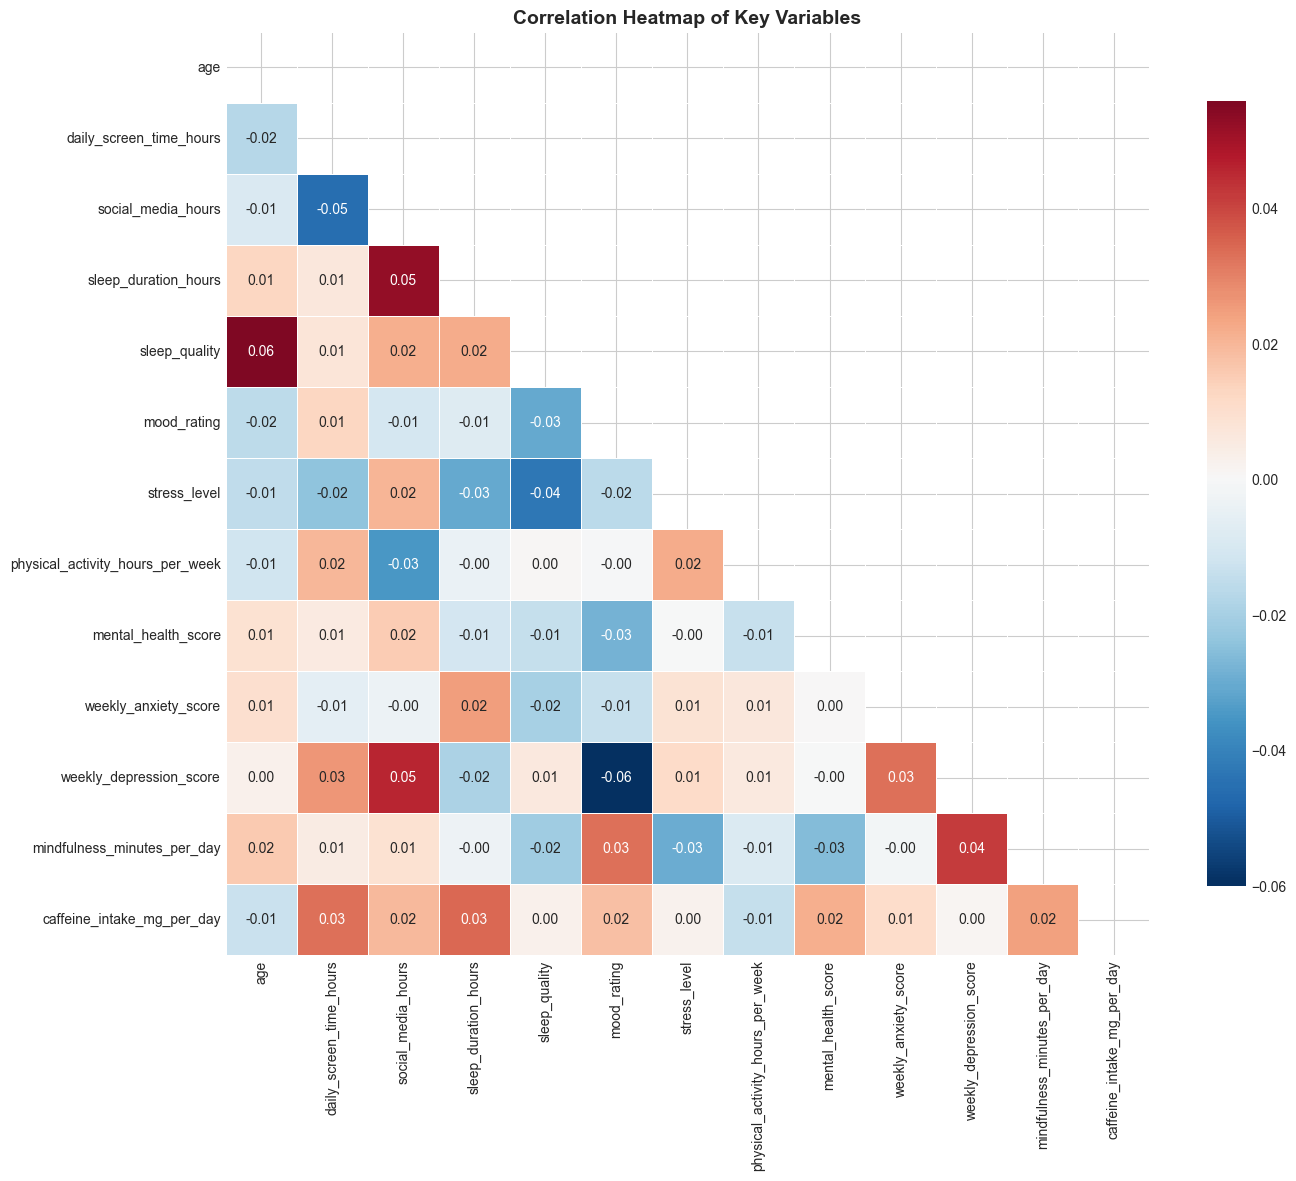

In [24]:
# Select key numeric variables for heatmap
heatmap_vars = ['age', 'daily_screen_time_hours', 'social_media_hours', 'sleep_duration_hours',
                'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week',
                'mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score',
                'mindfulness_minutes_per_day', 'caffeine_intake_mg_per_day']

corr_matrix = df[heatmap_vars].corr()

fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Key Variables', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## 5. Interpretation & Real-World Applications

### 5.1 Key Findings Summary

In [25]:
print("="*70)
print("KEY FINDINGS SUMMARY")
print("="*70)

# Calculate key metrics
avg_screen_time = df['daily_screen_time_hours'].mean()
avg_mental_health = df['mental_health_score'].mean()
avg_sleep = df['sleep_duration_hours'].mean()

print(f"\n1. SCREEN TIME PATTERNS:")
print(f"   - Average daily screen time: {avg_screen_time:.2f} hours")
print(f"   - Phone is the most used device ({df['phone_usage_hours'].mean():.2f} hours/day)")

print(f"\n2. MENTAL HEALTH METRICS:")
print(f"   - Average mental health score: {avg_mental_health:.2f}/100")
print(f"   - Average anxiety score: {df['weekly_anxiety_score'].mean():.2f}")
print(f"   - Average depression score: {df['weekly_depression_score'].mean():.2f}")

print(f"\n3. LIFESTYLE FACTORS:")
print(f"   - Average sleep duration: {avg_sleep:.2f} hours")
print(f"   - {df['uses_wellness_apps'].mean()*100:.1f}% use wellness apps")
print(f"   - {df['eats_healthy'].mean()*100:.1f}% report healthy eating habits")

KEY FINDINGS SUMMARY

1. SCREEN TIME PATTERNS:
   - Average daily screen time: 6.03 hours
   - Phone is the most used device (3.02 hours/day)

2. MENTAL HEALTH METRICS:
   - Average mental health score: 49.65/100
   - Average anxiety score: 9.89
   - Average depression score: 10.05

3. LIFESTYLE FACTORS:
   - Average sleep duration: 6.54 hours
   - 38.8% use wellness apps
   - 50.7% report healthy eating habits


### 5.2 Factors Influencing Mental Health

In [26]:
# Calculate correlations with mental health score
mental_health_correlations = df[heatmap_vars].corrwith(df['mental_health_score']).drop('mental_health_score')
mental_health_correlations = mental_health_correlations.sort_values(ascending=False)

print("Correlations with Mental Health Score:")
print("-" * 50)
for var, corr in mental_health_correlations.items():
    direction = "↑" if corr > 0 else "↓"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{var}: {corr:+.4f} {direction} ({strength})")

Correlations with Mental Health Score:
--------------------------------------------------
caffeine_intake_mg_per_day: +0.0218 ↑ (Weak)
social_media_hours: +0.0155 ↑ (Weak)
age: +0.0092 ↑ (Weak)
daily_screen_time_hours: +0.0055 ↑ (Weak)
weekly_anxiety_score: +0.0002 ↑ (Weak)
stress_level: -0.0000 ↓ (Weak)
weekly_depression_score: -0.0001 ↓ (Weak)
sleep_duration_hours: -0.0111 ↓ (Weak)
physical_activity_hours_per_week: -0.0138 ↓ (Weak)
sleep_quality: -0.0142 ↓ (Weak)
mindfulness_minutes_per_day: -0.0257 ↓ (Weak)
mood_rating: -0.0282 ↓ (Weak)


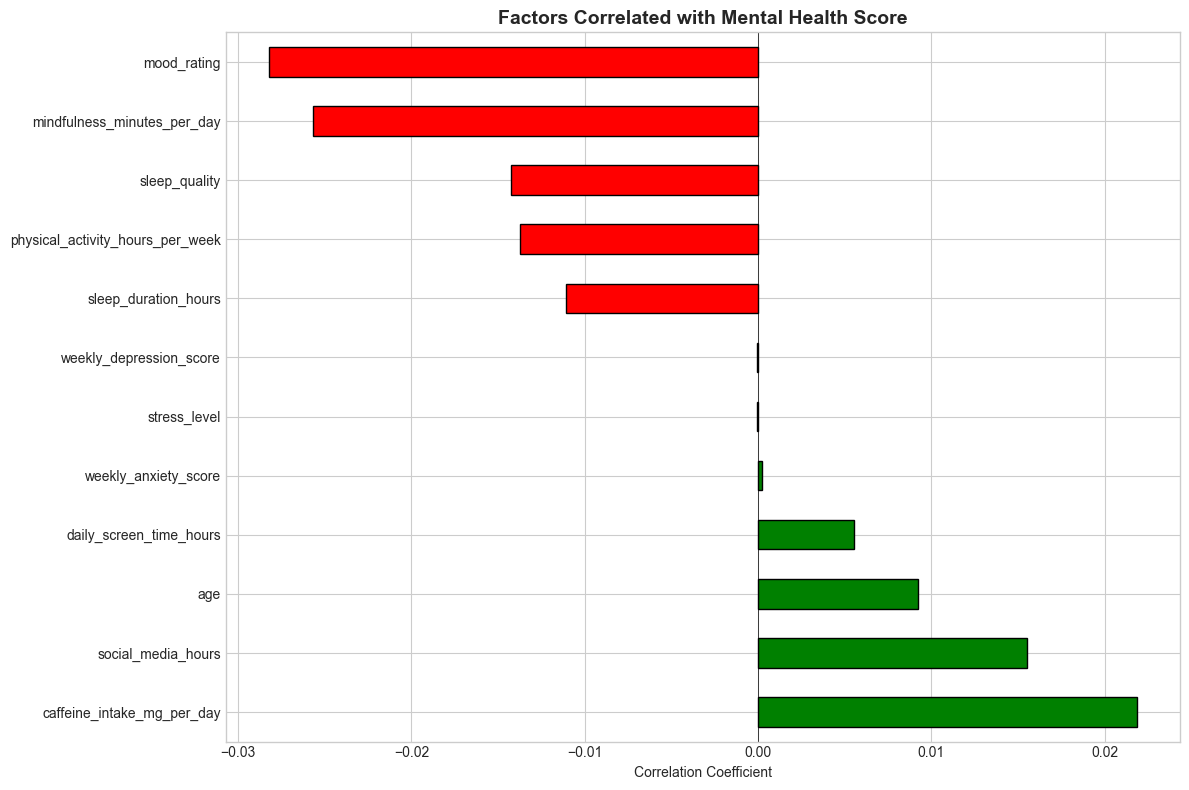

In [27]:
# Bar chart of correlations
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in mental_health_correlations]
mental_health_correlations.plot(kind='barh', color=colors, edgecolor='black', ax=ax)
plt.title('Factors Correlated with Mental Health Score', fontweight='bold', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 5.3 Real-World Recommendations

In [28]:
print("="*70)
print("REAL-WORLD RECOMMENDATIONS")
print("="*70)

print("""
Based on our analysis, we recommend the following for improving mental health:

📱 DIGITAL WELLNESS:
   • Monitor and potentially reduce daily screen time
   • Be mindful of social media usage patterns
   • Consider using wellness apps for mental health support

😴 SLEEP OPTIMIZATION:
   • Prioritize consistent sleep duration (aim for 7-9 hours)
   • Focus on sleep quality, not just quantity
   • Reduce screen time before bed

🏃 PHYSICAL ACTIVITY:
   • Incorporate regular physical activity into daily routine
   • Even moderate activity can have positive effects

🥗 NUTRITION & LIFESTYLE:
   • Maintain healthy eating habits
   • Practice mindfulness regularly
   • Monitor caffeine intake

📊 FOR POLICY MAKERS:
   • Develop digital wellness programs
   • Promote awareness about screen time effects
   • Support mental health resources in all location types
""")

REAL-WORLD RECOMMENDATIONS

Based on our analysis, we recommend the following for improving mental health:

📱 DIGITAL WELLNESS:
   • Monitor and potentially reduce daily screen time
   • Be mindful of social media usage patterns
   • Consider using wellness apps for mental health support

😴 SLEEP OPTIMIZATION:
   • Prioritize consistent sleep duration (aim for 7-9 hours)
   • Focus on sleep quality, not just quantity
   • Reduce screen time before bed

🏃 PHYSICAL ACTIVITY:
   • Incorporate regular physical activity into daily routine
   • Even moderate activity can have positive effects

🥗 NUTRITION & LIFESTYLE:
   • Maintain healthy eating habits
   • Practice mindfulness regularly
   • Monitor caffeine intake

📊 FOR POLICY MAKERS:
   • Develop digital wellness programs
   • Promote awareness about screen time effects
   • Support mental health resources in all location types



## 6. Conclusion

In [29]:
print("="*70)
print("CONCLUSION")
print("="*70)
print("""
This exploratory data analysis of the Digital Diet & Mental Health dataset 
revealed several important insights:

1. HYPOTHESIS TESTING RESULTS:
   - Tested multiple hypotheses regarding screen time, wellness apps,
     location type, and physical activity relationships with mental health
   - Used appropriate statistical tests (t-tests, ANOVA) with clear
     null and alternative hypotheses

2. CORRELATION FINDINGS:
   - Applied multiple correlation methods (Pearson, Spearman, Kendall's Tau,
     Point-Biserial, and Phi coefficient)
   - Identified key factors associated with mental health outcomes

3. PRACTICAL IMPLICATIONS:
   - Screen time management is important for mental wellness
   - Sleep quality and physical activity play crucial roles
   - Lifestyle factors like healthy eating have measurable associations
     with mental health outcomes

This analysis provides data-driven insights that can guide both individual
lifestyle choices and broader public health policy recommendations.
""")

CONCLUSION

This exploratory data analysis of the Digital Diet & Mental Health dataset 
revealed several important insights:

1. HYPOTHESIS TESTING RESULTS:
   - Tested multiple hypotheses regarding screen time, wellness apps,
     location type, and physical activity relationships with mental health
   - Used appropriate statistical tests (t-tests, ANOVA) with clear
     null and alternative hypotheses

2. CORRELATION FINDINGS:
   - Applied multiple correlation methods (Pearson, Spearman, Kendall's Tau,
     Point-Biserial, and Phi coefficient)
   - Identified key factors associated with mental health outcomes

3. PRACTICAL IMPLICATIONS:
   - Screen time management is important for mental wellness
   - Sleep quality and physical activity play crucial roles
   - Lifestyle factors like healthy eating have measurable associations
     with mental health outcomes

This analysis provides data-driven insights that can guide both individual
lifestyle choices and broader public health policy 